In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
sales=pd.read_csv('AusApparalSales4thQrt2020.csv')
sales

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [3]:
sales.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [4]:
sales.describe() #stats of all numeric variables are displayed

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [7]:
###find out unique categories of the categorical columns
print(sales.Date.unique())
print(sales.Date.nunique())

['1-Oct-2020' '2-Oct-2020' '3-Oct-2020' '4-Oct-2020' '5-Oct-2020'
 '6-Oct-2020' '7-Oct-2020' '8-Oct-2020' '9-Oct-2020' '10-Oct-2020'
 '11-Oct-2020' '12-Oct-2020' '13-Oct-2020' '14-Oct-2020' '15-Oct-2020'
 '16-Oct-2020' '17-Oct-2020' '18-Oct-2020' '19-Oct-2020' '20-Oct-2020'
 '21-Oct-2020' '22-Oct-2020' '23-Oct-2020' '24-Oct-2020' '25-Oct-2020'
 '26-Oct-2020' '27-Oct-2020' '28-Oct-2020' '29-Oct-2020' '30-Oct-2020'
 '1-Nov-2020' '2-Nov-2020' '3-Nov-2020' '4-Nov-2020' '5-Nov-2020'
 '6-Nov-2020' '7-Nov-2020' '8-Nov-2020' '9-Nov-2020' '10-Nov-2020'
 '11-Nov-2020' '12-Nov-2020' '13-Nov-2020' '14-Nov-2020' '15-Nov-2020'
 '16-Nov-2020' '17-Nov-2020' '18-Nov-2020' '19-Nov-2020' '20-Nov-2020'
 '21-Nov-2020' '22-Nov-2020' '23-Nov-2020' '24-Nov-2020' '25-Nov-2020'
 '26-Nov-2020' '27-Nov-2020' '28-Nov-2020' '29-Nov-2020' '30-Nov-2020'
 '1-Dec-2020' '2-Dec-2020' '3-Dec-2020' '4-Dec-2020' '5-Dec-2020'
 '6-Dec-2020' '7-Dec-2020' '8-Dec-2020' '9-Dec-2020' '10-Dec-2020'
 '11-Dec-2020' '12-Dec-2020' '13-

In [20]:
sales.Time.unique()

array([' Morning', ' Afternoon', ' Evening'], dtype=object)

In [21]:
sales.State.unique()

array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object)

In [8]:
print(sales.Group.unique())
print(sales.Group.value_counts())

[' Kids' ' Men' ' Women' ' Seniors']
 Kids       1890
 Men        1890
 Women      1890
 Seniors    1890
Name: Group, dtype: int64


##### standardization:

In [10]:
(220+185+280+2250+485)/5

684.0

#### Data Normalization
* For performing the data normalization, first of all, we need to separate the numerical and non numerica data. We will create a new dataframe called sales_dataonly from the existing df object, as follows:

In [11]:
sales_dataonly = sales[['Unit', 'Sales']]

In [12]:
#Now, from the MinMaxScalar method class, create a normalize object, as shown below:

normalize = MinMaxScaler()

In [14]:
#Next, invoke the fit_transform() method, and pass this newly created object called sales_dataonly. 
#Let's name the resulting object as normalize_data.

normalize_data = normalize.fit_transform(sales_dataonly)

print(normalize_data)
print(normalize_data.shape)

[[0.0952381  0.0952381 ]
 [0.0952381  0.0952381 ]
 [0.03174603 0.03174603]
 ...
 [0.20634921 0.20634921]
 [0.14285714 0.14285714]
 [0.17460317 0.17460317]]
(7560, 2)


* As you can see, normalize_data object is a ndarray of 2 columns and 7560 rows. The first columns in the Unit, and the second column is the Sales data. The normalization will render normalize the data for each column between 0 and 1. You can test it as follows:

* normalize_data[:, [0]] will list all the values of normailzed Unit values, while normalize_data[:, [1]] will list all the values of normalized Sales values.

In [26]:
normalize_data[:, [0]] #shows the normalised Unit values

array([[0.0952381 ],
       [0.0952381 ],
       [0.03174603],
       ...,
       [0.20634921],
       [0.14285714],
       [0.17460317]])

In [27]:
normalize_data[:, [1]] #shows the normalised Sales values

array([[0.0952381 ],
       [0.0952381 ],
       [0.03174603],
       ...,
       [0.20634921],
       [0.14285714],
       [0.17460317]])

In [15]:
### we apply standardization when we have no idea about the distribution of the variable. Normalization is applied
### when we know that the variable follows a normal distribution. Standardization is always prefereed over normalozation.
### standardization has no fixed limit.Normalization has a fixed range (0,1) so avery extreme value might not get 
### transformed within this predefined range.

In [30]:
sales_nw=sales.copy()

In [31]:
sales_nw['Unit']=(sales_nw['Unit']-sales_nw['Unit'].min())/(sales_nw['Unit'].max()-sales_nw['Unit'].min())

In [32]:
sales_nw['Sales']=(sales_nw['Sales']-sales_nw['Sales'].min())/(sales_nw['Sales'].max()-sales_nw['Sales'].min())

In [33]:
sales_nw

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,0.190476,0.190476
7556,30-Dec-2020,Evening,TAS,Kids,0.206349,0.206349
7557,30-Dec-2020,Evening,TAS,Men,0.206349,0.206349
7558,30-Dec-2020,Evening,TAS,Women,0.142857,0.142857


### We use the groupby function to filter data pertaining to a unique/distinct category of a categorical variable.

In [34]:
sales_nw.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [35]:
sales_nw.groupby(['State','Group']).sum('Sales')

Unit       Sales
State Group                           
 NSW   Kids     109.444444  109.444444
       Men      112.206349  112.206349
       Seniors  106.904762  106.904762
       Women    113.158730  113.158730
 NT    Kids      27.619048   27.619048
       Men       28.015873   28.015873
       Seniors   26.126984   26.126984
       Women     27.317460   27.317460
 QLD   Kids      45.460317   45.460317
       Men       44.714286   44.714286
       Seniors   43.428571   43.428571
       Women     44.285714   44.285714
 SA    Kids      83.587302   83.587302
       Men       84.476190   84.476190
       Seniors   84.873016   84.873016
       Women     86.476190   86.476190
 TAS   Kids      28.095238   28.095238
       Men       27.984127   27.984127
       Seniors   27.301587   27.301587
       Women     26.841270   26.841270
 VIC   Kids     158.793651  158.793651
       Men      159.095238  159.095238
       Seniors  158.507937  158.507937
       Women    159.571429  159.571429
 WA    Kids      27.142857   27.142857
       Men       27.952381   27.952381
       Seniors   26.428571   26.428571
       Women     24.841270   24.841270

In [36]:
###highest and lowest sales:
highest_sales_group=sales_nw.groupby(['Group']).sum('Sales').idxmax()
lowest_sales_group=sales_nw.groupby(['Group']).sum('Sales').idxmin()
print('highest_sales_group:',highest_sales_group)
print('lowest_sales_group:',lowest_sales_group)

highest_sales_group: Unit      Men
Sales     Men
dtype: object
lowest_sales_group: Unit      Seniors
Sales     Seniors
dtype: object


In [37]:
### highest and lowest sales-STATE:
highest_sales_State=sales_nw.groupby(['State']).sum('Sales').idxmax()
lowest_sales_State=sales_nw.groupby(['State']).sum('Sales').idxmin()
print('highest_sales_State:',highest_sales_State)
print('lowest_sales_State:',lowest_sales_State)

highest_sales_State: Unit      VIC
Sales     VIC
dtype: object
lowest_sales_State: Unit      WA
Sales     WA
dtype: object


In [39]:
#### Formulae for normalization is-( X-Xmin/Xmax-Xmin)

In [40]:
#### Formaulae for standardization is - (X-mean(X)/sd(X))

#### Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted

In [18]:
print(sales.Date.unique())

['1-Oct-2020' '2-Oct-2020' '3-Oct-2020' '4-Oct-2020' '5-Oct-2020'
 '6-Oct-2020' '7-Oct-2020' '8-Oct-2020' '9-Oct-2020' '10-Oct-2020'
 '11-Oct-2020' '12-Oct-2020' '13-Oct-2020' '14-Oct-2020' '15-Oct-2020'
 '16-Oct-2020' '17-Oct-2020' '18-Oct-2020' '19-Oct-2020' '20-Oct-2020'
 '21-Oct-2020' '22-Oct-2020' '23-Oct-2020' '24-Oct-2020' '25-Oct-2020'
 '26-Oct-2020' '27-Oct-2020' '28-Oct-2020' '29-Oct-2020' '30-Oct-2020'
 '1-Nov-2020' '2-Nov-2020' '3-Nov-2020' '4-Nov-2020' '5-Nov-2020'
 '6-Nov-2020' '7-Nov-2020' '8-Nov-2020' '9-Nov-2020' '10-Nov-2020'
 '11-Nov-2020' '12-Nov-2020' '13-Nov-2020' '14-Nov-2020' '15-Nov-2020'
 '16-Nov-2020' '17-Nov-2020' '18-Nov-2020' '19-Nov-2020' '20-Nov-2020'
 '21-Nov-2020' '22-Nov-2020' '23-Nov-2020' '24-Nov-2020' '25-Nov-2020'
 '26-Nov-2020' '27-Nov-2020' '28-Nov-2020' '29-Nov-2020' '30-Nov-2020'
 '1-Dec-2020' '2-Dec-2020' '3-Dec-2020' '4-Dec-2020' '5-Dec-2020'
 '6-Dec-2020' '7-Dec-2020' '8-Dec-2020' '9-Dec-2020' '10-Dec-2020'
 '11-Dec-2020' '12-Dec-2020' '13-

In [41]:
### convert the date to its appropriate datetime format:
sales_nw['Date']=pd.to_datetime(sales_nw['Date'])
print(sales_nw.head(2))
print(sales_nw.Date.dtypes)

        Date      Time State  Group      Unit     Sales
0 2020-10-01   Morning    WA   Kids  0.095238  0.095238
1 2020-10-01   Morning    WA    Men  0.095238  0.095238
datetime64[ns]


In [44]:
sales_nw.info() #default datetime format in python is yyyy-mm-dd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   float64       
 5   Sales   7560 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 354.5+ KB


In [49]:
dates = sales_nw['Date']

df_unit_and_sales = sales_nw.groupby(by='Date', axis='index').sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8520\2002842191.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_unit_and_sales = sales_nw.groupby(by='Date', axis='index').sum()


In [51]:
df_unit_and_sales.head()

,Unit,Sales
Date,,
2020-10-01,20.952381,20.952381
2020-10-02,20.920635,20.920635
2020-10-03,22.031746,22.031746
2020-10-04,20.952381,20.952381
2020-10-05,21.857143,21.857143


In [52]:
df_oct=df_unit_and_sales.loc['2020-10-01':'2020-10-30']

In [53]:
df_oct.shape

(30, 2)

In [54]:
df_nov = df_unit_and_sales.loc['2020-11-01':'2020-11-30']

In [55]:
df_dec = df_unit_and_sales.loc['2020-12-01':'2020-12-31']

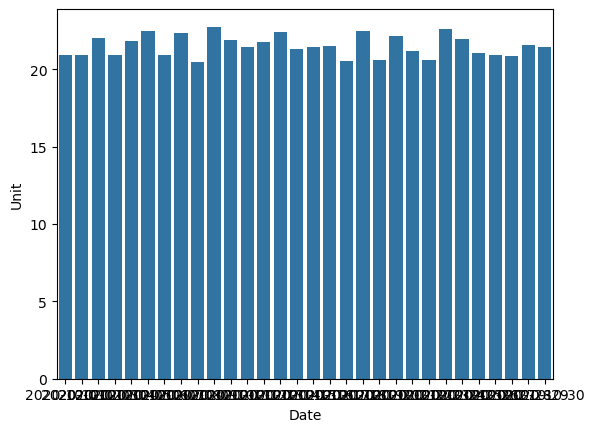

In [59]:
df_oct.index
sns.barplot(x = df_oct.index, y = 'Unit', data=df_oct)
plt.show()

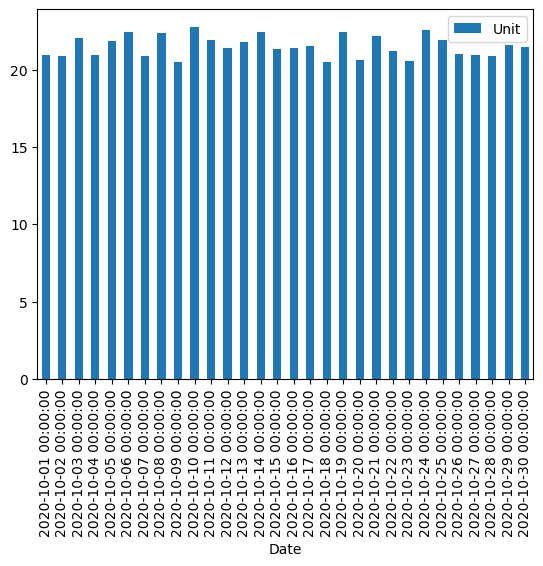

In [58]:
df_oct.plot.bar(y='Unit')
plt.show()

[Text(0.5, 1.0, 'December Sales')]

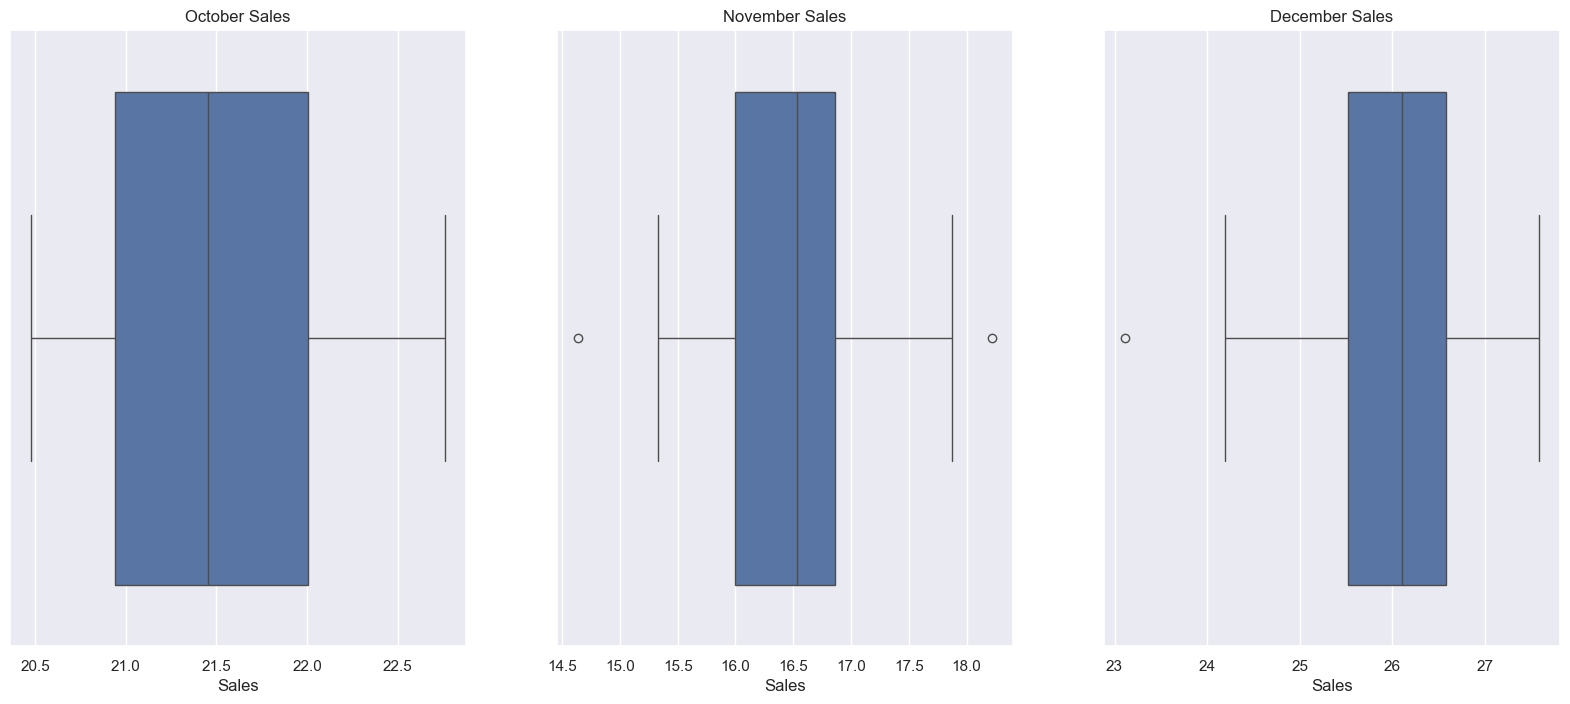

In [70]:
sns.set(rc={'figure.figsize':(20,8)})
fig, axes = plt.subplots(1, 3)
bp_oct = sns.boxplot(x='Sales', data=df_oct, ax=axes[0])
bp_nov = sns.boxplot(x='Sales', data=df_nov, ax=axes[1])
bp_dec = sns.boxplot(x='Sales', data=df_dec, ax=axes[2])
bp_oct.set(title='October Sales')
bp_nov.set(title='November Sales')
bp_dec.set(title='December Sales')

[Text(0.5, 0, 'Dev 2020'), Text(0.5, 1.0, 'December Sales')]

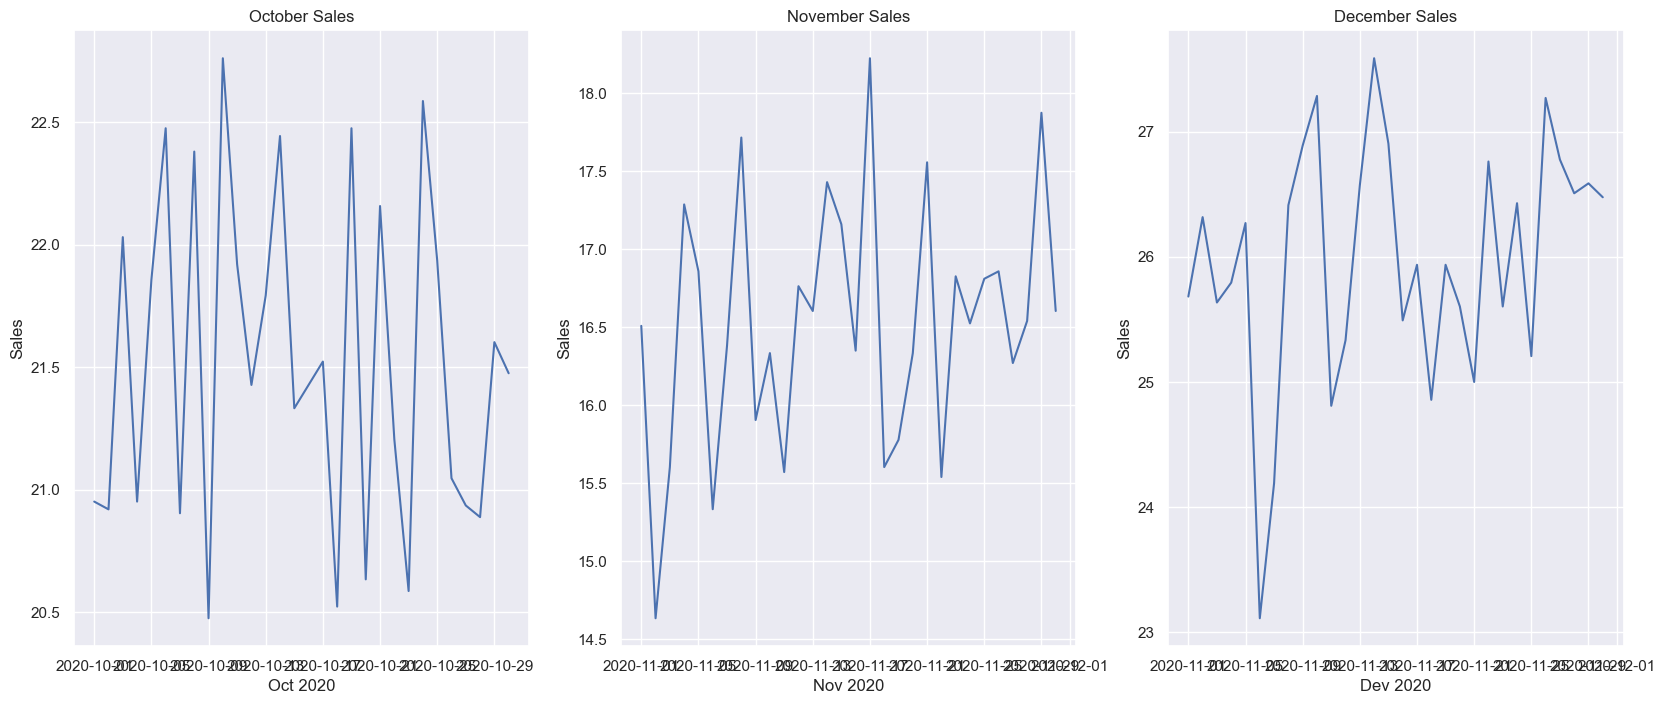

In [63]:
import matplotlib
# sns.lineplot(x = 'Date', y = 'Unit', data = df)
sns.set(rc={'figure.figsize':(20,8)})
fig, axes = plt.subplots(1, 3)
lp_oct = sns.lineplot(x = df_oct.index, y = 'Sales', data=df_oct, ax=axes[0])
lp_nov = sns.lineplot(x = df_nov.index, y = 'Sales', data=df_nov, ax = axes[1])
lp_dec = sns.lineplot(x = df_nov.index, y = 'Sales', data=df_dec, ax = axes[2])

lp_oct.set(xlabel='Oct 2020', title='October Sales')
lp_nov.set(xlabel='Nov 2020', title='November Sales')
lp_dec.set(xlabel='Dev 2020', title='December Sales')


<Axes: xlabel='Date', ylabel='Sales'>

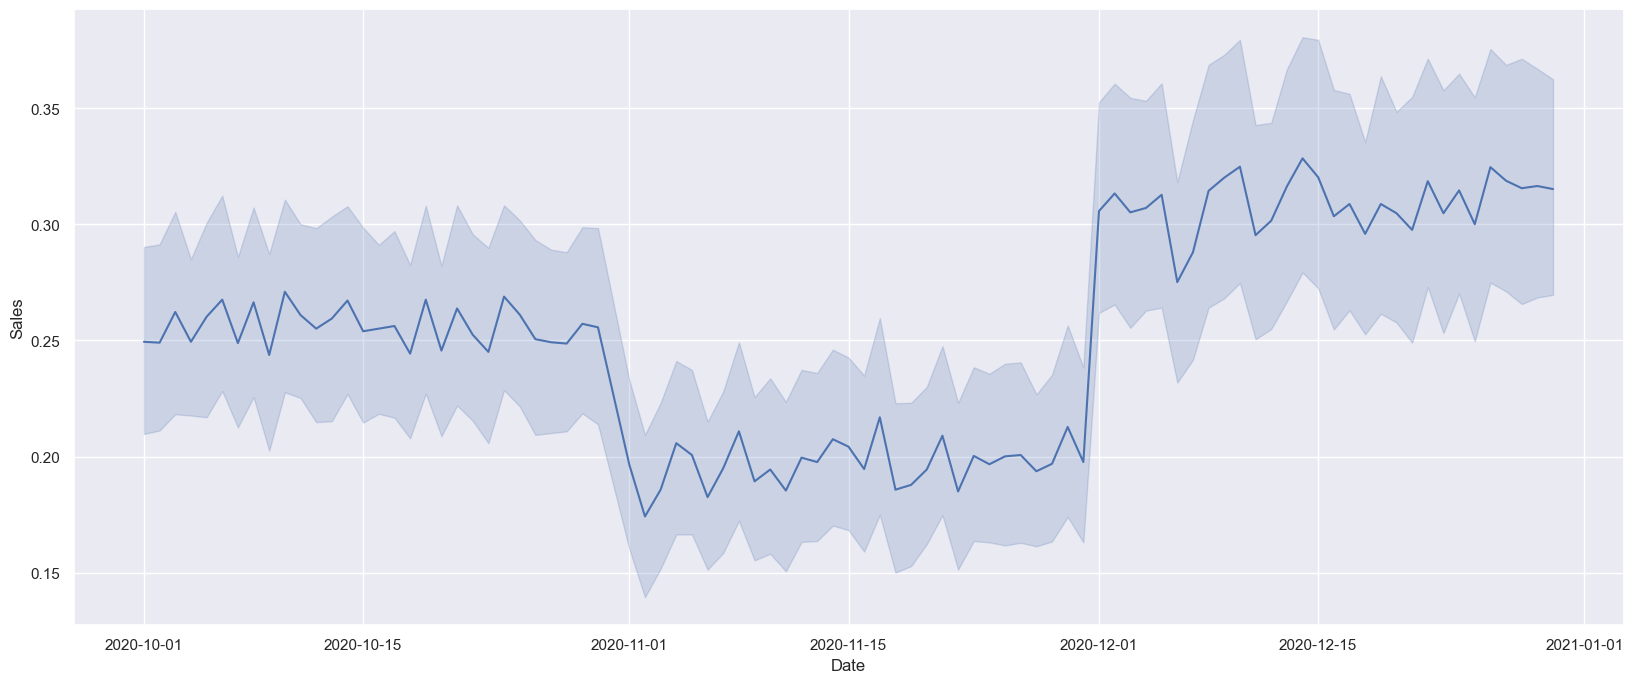

In [65]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x = 'Date', y = 'Sales', data = sales_nw)

 ##### Resample method: we use this method when we work with time varying data.  the most commonly used frequencies we use to get a unique sampling distribution are W: weekly,M: Monthly,Q: quaterly SM: semi monthly(15 days)

In [66]:
weekly_data=sales_nw.resample('W',on='Date')['Sales'].sum()
weekly_data

Date
2020-10-04     84.857143
2020-10-11    152.777778
2020-10-18    150.476190
2020-10-25    151.587302
2020-11-01    122.460317
2020-11-08    113.809524
2020-11-15    115.761905
2020-11-22    115.380952
2020-11-29    117.698413
2020-12-06    169.412698
2020-12-13    181.492063
2020-12-20    182.317460
2020-12-27    183.047619
2021-01-03     79.571429
Freq: W-SUN, Name: Sales, dtype: float64

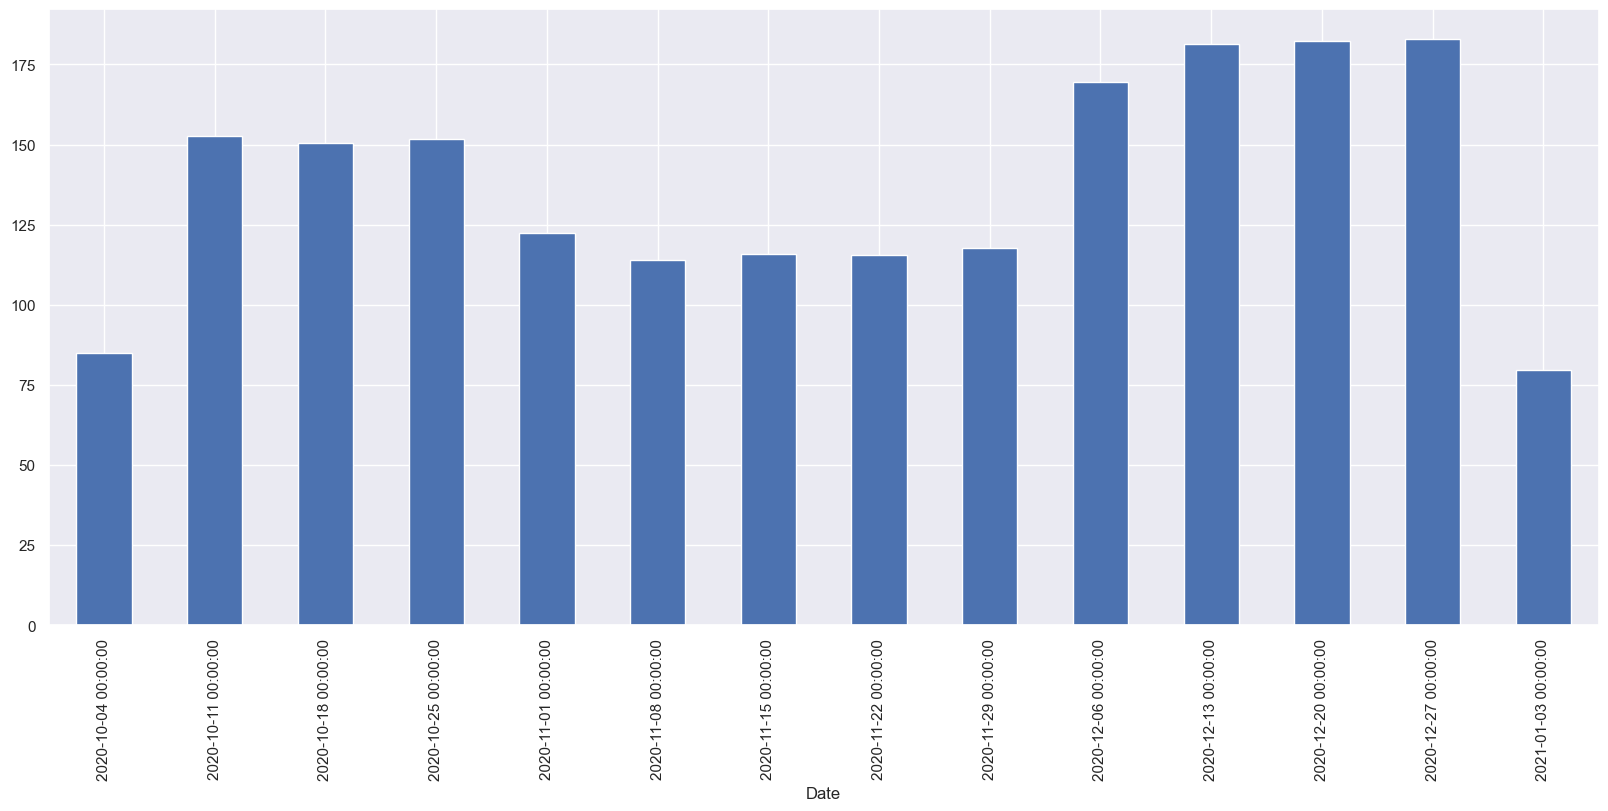

In [78]:
sales_nw.resample('W',on='Date')['Sales'].sum().plot(kind='bar')
plt.show()

In [69]:
weekly_data.max()  # highest weekly sales is 183 units it is in the last week of December.

183.04761904761904

In [67]:
monthly_data=sales_nw.resample('M',on='Date')['Sales'].sum()
monthly_data

Date
2020-10-31    645.650794
2020-11-30    495.761905
2020-12-31    779.238095
Freq: M, Name: Sales, dtype: float64

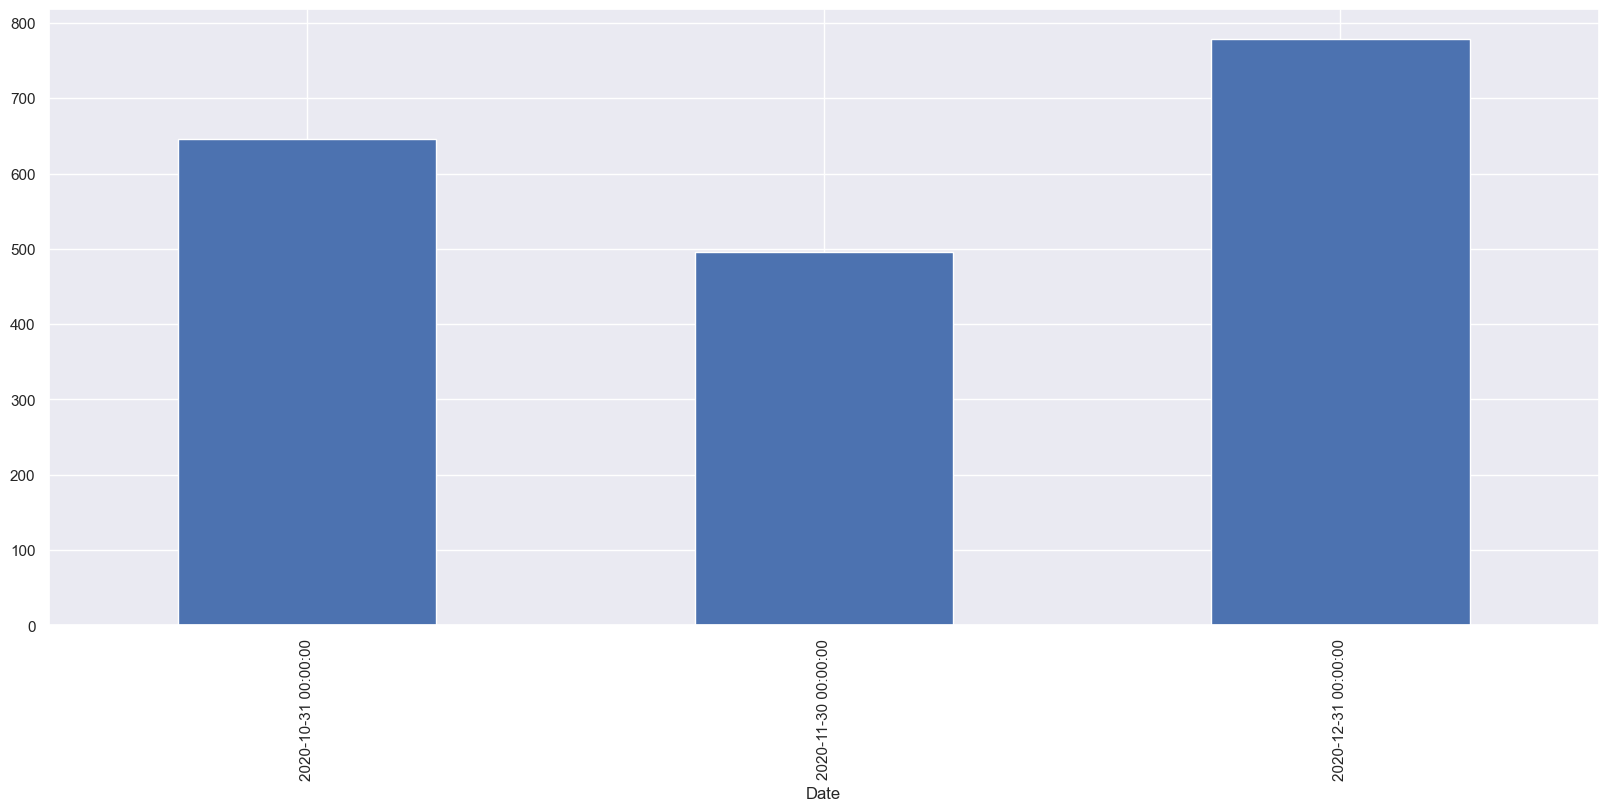

In [79]:
sales_nw.resample('M',on='Date')['Sales'].sum().plot(kind='bar')
plt.show()

In [68]:
quarter_sales=sales_nw.resample('Q',on='Date')['Sales'].sum()
quarter_sales

Date
2020-12-31    1920.650794
Freq: Q-DEC, Name: Sales, dtype: float64

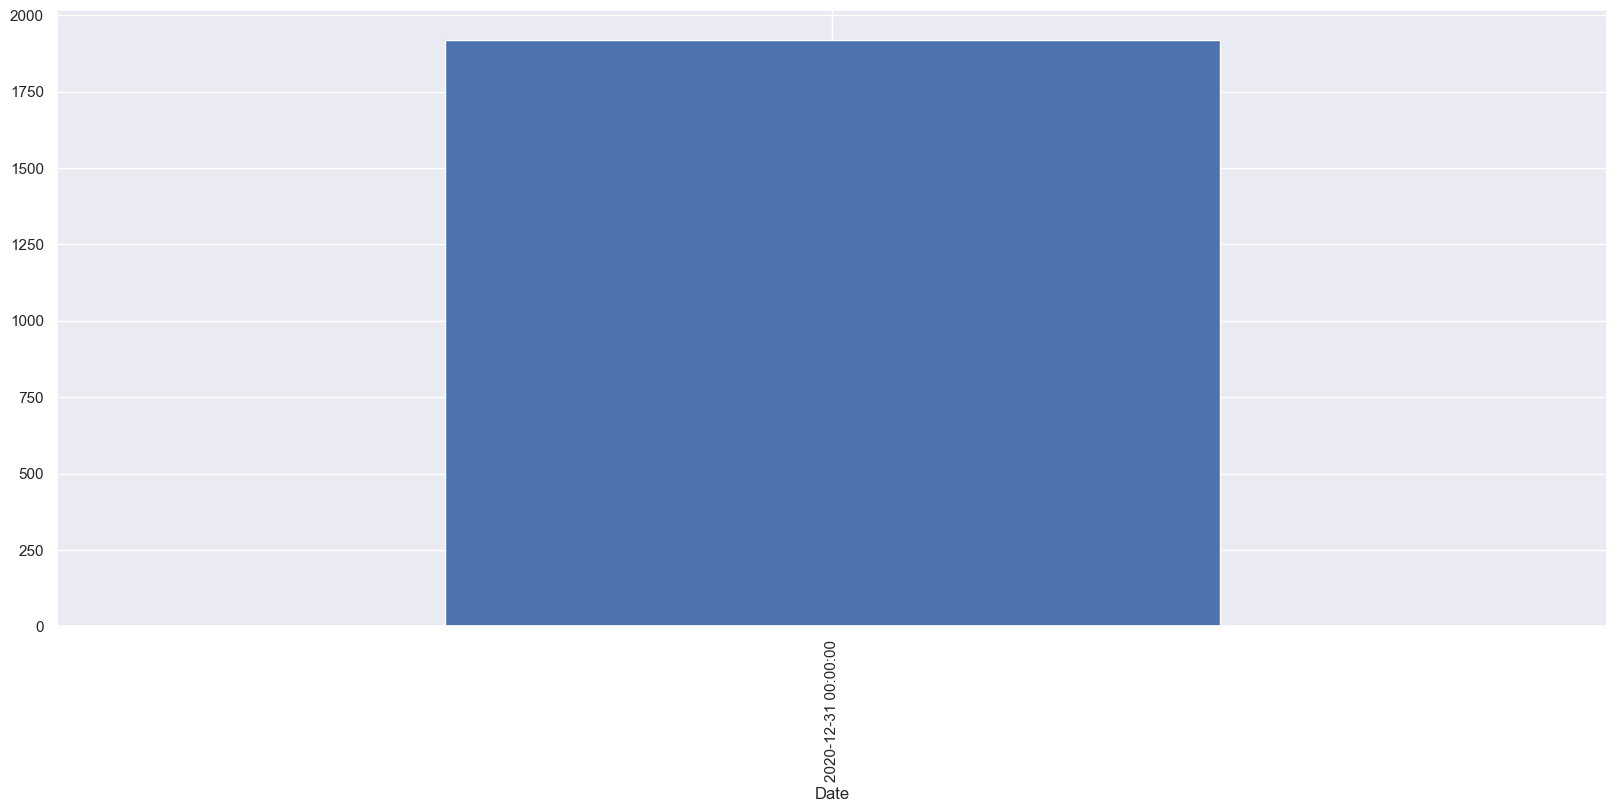

In [80]:
sales_nw.resample('Q',on='Date')['Sales'].sum().plot(kind='bar')
plt.show()

#### State-wise sales analysis for different demographic groups (kids, women, men, and seniors)

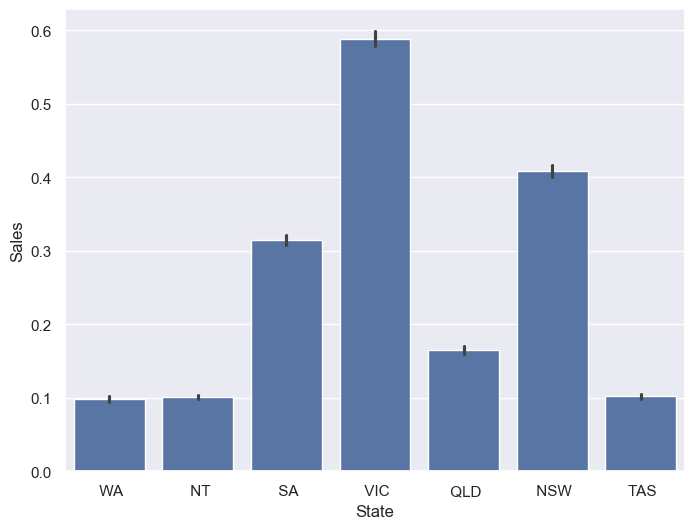

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(x=sales_nw['State'],y=sales_nw['Sales'],data=sales_nw)
plt.show()

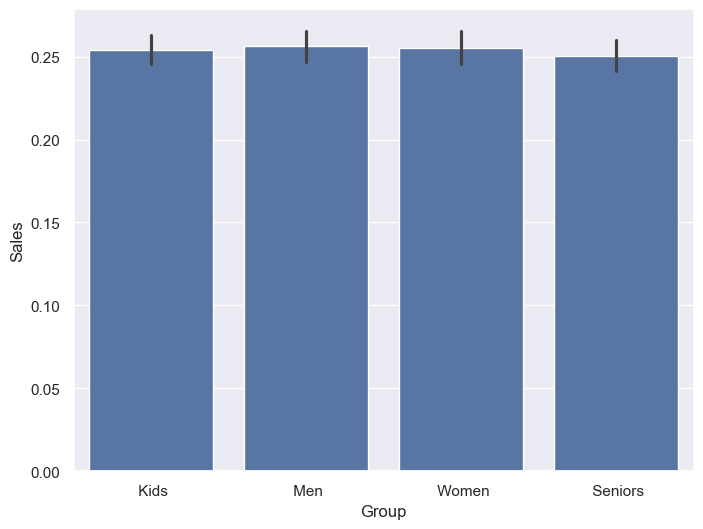

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(x=sales_nw['Group'],y=sales_nw['Sales'],data=sales_nw)
plt.show()

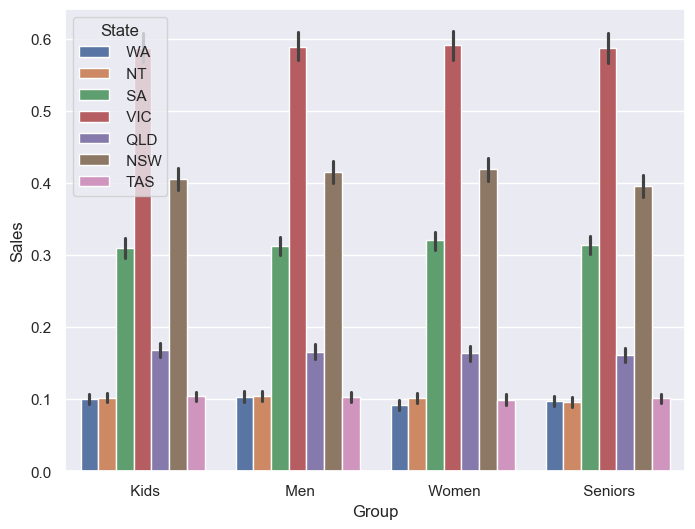

In [73]:
plt.figure(figsize=(8,6))
sns.barplot(x=sales_nw['Group'],y=sales_nw['Sales'],hue='State',data=sales_nw)
plt.show()

#### Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. 

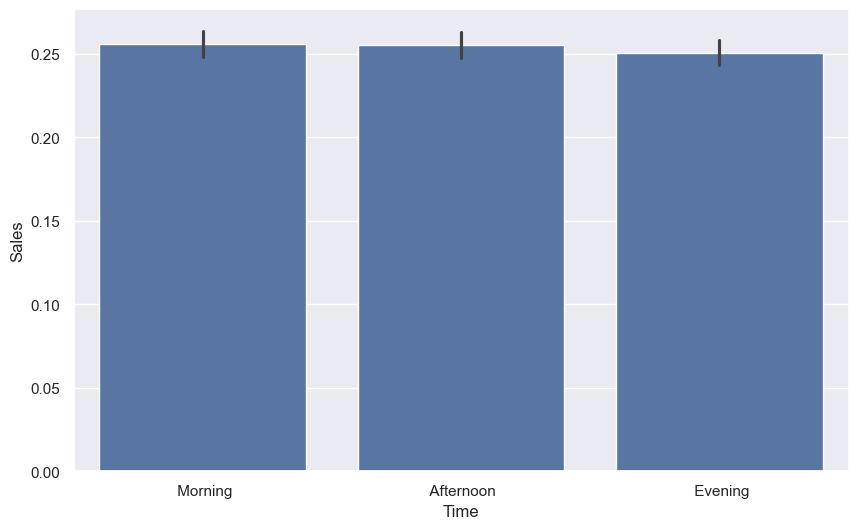

In [76]:
#time vs sales:
plt.figure(figsize=(10,6))
sns.barplot(x=sales_nw['Time'],y=sales_nw['Sales'])
plt.show()

#### Use a box plot for descriptive statistics

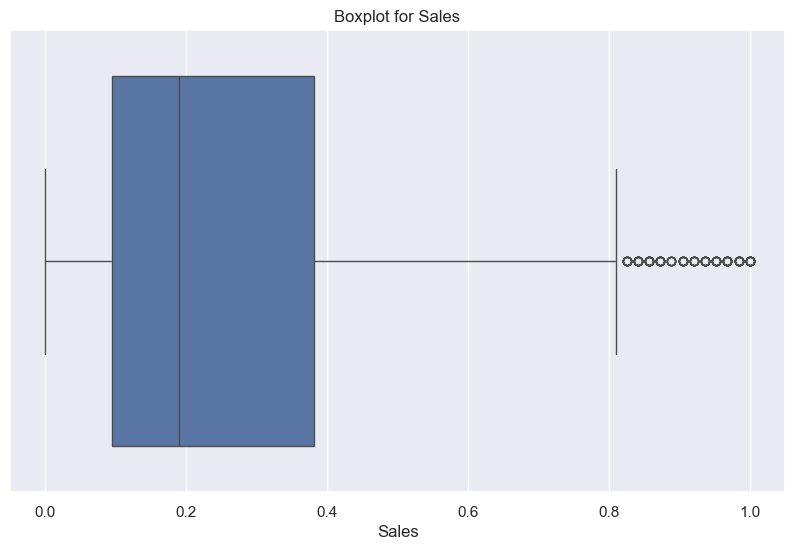

In [81]:
plt.figure(figsize=(10,6))
sns.boxplot(x=sales_nw['Sales'])
plt.title('Boxplot for Sales')
plt.show()

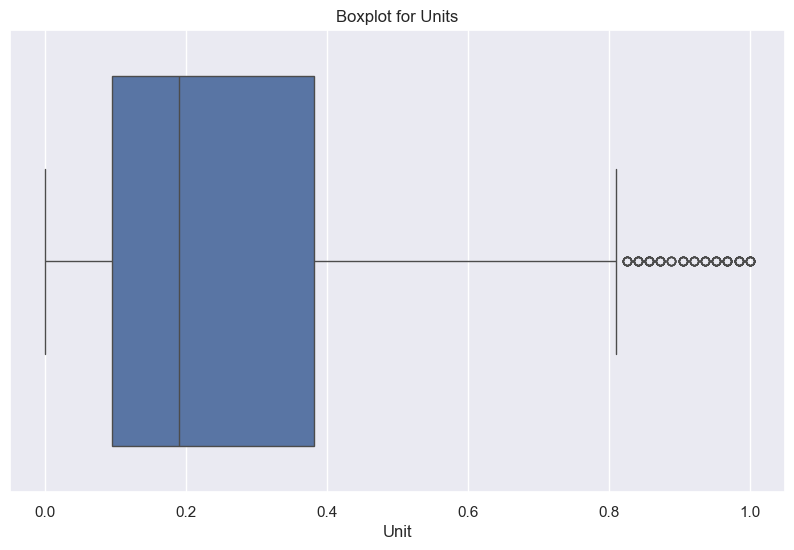

In [83]:
plt.figure(figsize=(10,6))
sns.boxplot(x=sales_nw['Unit'])
plt.title('Boxplot for Units')
plt.show()

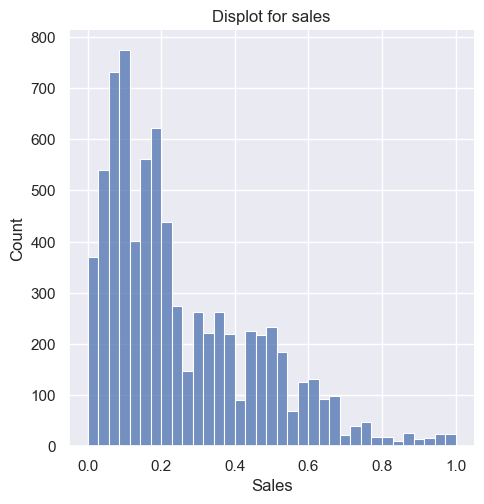

In [84]:
sns.displot(x=sales_nw['Sales'])
plt.title('Displot for sales')
plt.show()

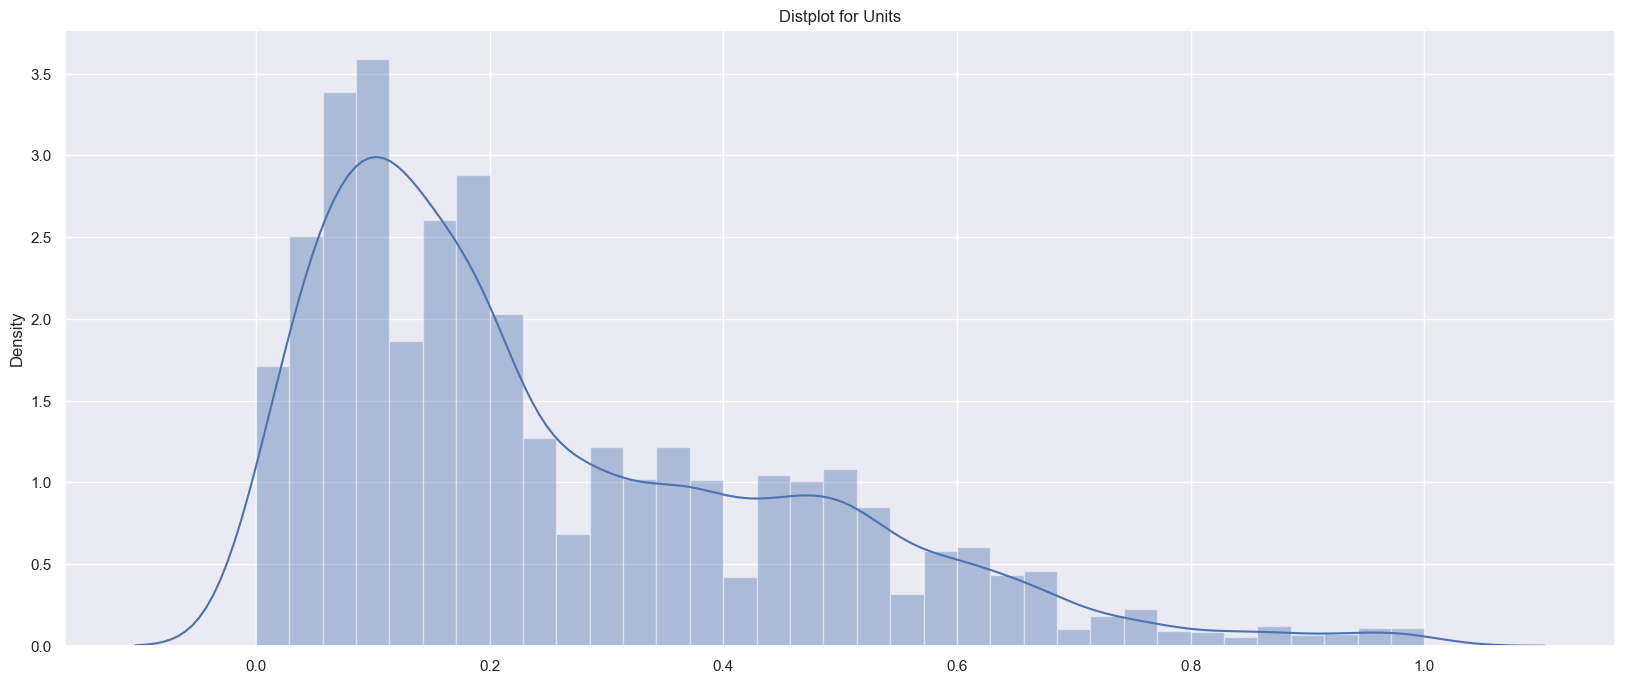

In [86]:
import warnings
warnings.filterwarnings('ignore')


sns.distplot(x=sales_nw['Unit'])
plt.title('Distplot for Units')
plt.show()